In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option('display.max_columns', 500)

In [35]:
from utils import load_fold
from utils import outer_product
from utils import group_data
from utils import sklearn_train_test_split
from utils import create_model
from utils import get_random_batch
from imblearn.under_sampling import RandomUnderSampler
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import ModelCheckpoint
from utils import evaluate_metrics
from utils import plot_losses

In [25]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [47]:
def evaluate_fold(fold):
    train, test, test_fold = load_fold('Raw', fold)
    X_train, y_train = group_data(outer_product(train))
    X_test, y_test = group_data(outer_product(test))
    X_tra, X_val, y_tra, y_val = sklearn_train_test_split(
                    X_train, y_train, 0.1, random_state=42,
                    shuffle=True, stratify=y_train)
    
    model = KerasClassifier(create_model)    
    checkpointer = ModelCheckpoint(filepath='_data/model.best.hdf5',
                                   verbose=1, save_best_only=True)
    rus = RandomUnderSampler(random_state=0)
    X_train_batch, y_train_batch = get_random_batch(X_tra, y_tra, rus)
    X_val_batch, y_val_batch = get_random_batch(X_val, y_val, rus)    
    history = model.fit(X_train_batch.reshape(-1, 9, 9, 1), 
                    y_train_batch.reshape(-1), 
                     validation_data=(X_val_batch.reshape(-1, 9, 9, 1),
                                      y_val_batch.reshape(-1)),
                     batch_size=128, epochs=80, verbose=1, 
                     callbacks=[checkpointer], shuffle=True)
    
    y_pred = model.predict(X_val_batch.reshape(-1, 9, 9, 1))
    y_pred_proba = model.predict_proba(X_val_batch.reshape(-1, 9, 9, 1))
    df_val = evaluate_metrics(y_val_batch.reshape(-1), y_pred, y_pred_proba[:,1],
                              'CNN', test_fold, 'single-batch')
    
    y_pred = model.predict(X_test.reshape(-1, 9, 9, 1))
    y_pred_proba = model.predict_proba(X_test.reshape(-1, 9, 9, 1))
    df_test = evaluate_metrics(y_test.reshape(-1), y_pred, y_pred_proba[:,1],
                              'CNN', test_fold, 'single-batch')
    
    return df_val, df_test, history

In [ ]:
results_val = pd.DataFrame()
results_test = pd.DataFrame()
histories = []

# CTNNB1

In [80]:
df_val, df_test, history = evaluate_fold(0)

Test fold: CTNNB1.csv
Train fold: LEF1.csv
Train fold: Jnk.csv
Train fold: Erk.csv
Train fold: IRF4.csv
Train fold: MYC.csv
Train fold: Ikk2.csv
Train on 31896 samples, validate on 3540 samples
Epoch 1/80
31232/31896 [============================>.] - ETA: 0s - loss: 0.8471 - acc: 0.5231
Epoch 00001: val_loss improved from inf to 0.68456, saving model to _data/model.best.hdf5
31896/31896 [==============================] - 5s 154us/step - loss: 0.8451 - acc: 0.5240 - val_loss: 0.6846 - val_acc: 0.5246
Epoch 2/80
31488/31896 [============================>.] - ETA: 0s - loss: 0.7217 - acc: 0.5407
Epoch 00002: val_loss improved from 0.68456 to 0.67262, saving model to _data/model.best.hdf5
31896/31896 [==============================] - 3s 83us/step - loss: 0.7213 - acc: 0.5408 - val_loss: 0.6726 - val_acc: 0.5545
Epoch 3/80
31360/31896 [============================>.] - ETA: 0s - loss: 0.6787 - acc: 0.5788
Epoch 00003: val_loss improved from 0.67262 to 0.65011, saving model to _data/model.

Epoch 27/80
31104/31896 [============================>.] - ETA: 0s - loss: 0.5467 - acc: 0.7228
Epoch 00027: val_loss improved from 0.47759 to 0.47550, saving model to _data/model.best.hdf5
31896/31896 [==============================] - 3s 87us/step - loss: 0.5474 - acc: 0.7225 - val_loss: 0.4755 - val_acc: 0.7768
Epoch 28/80
31360/31896 [============================>.] - ETA: 0s - loss: 0.5434 - acc: 0.7242
Epoch 00028: val_loss improved from 0.47550 to 0.47488, saving model to _data/model.best.hdf5
31896/31896 [==============================] - 3s 82us/step - loss: 0.5435 - acc: 0.7245 - val_loss: 0.4749 - val_acc: 0.7794
Epoch 29/80
31104/31896 [============================>.] - ETA: 0s - loss: 0.5408 - acc: 0.7264
Epoch 00029: val_loss did not improve
31896/31896 [==============================] - 2s 73us/step - loss: 0.5409 - acc: 0.7263 - val_loss: 0.4749 - val_acc: 0.7757
Epoch 30/80
31744/31896 [============================>.] - ETA: 0s - loss: 0.5410 - acc: 0.7282
Epoch 00030:

31488/31896 [============================>.] - ETA: 0s - loss: 0.5254 - acc: 0.7375
Epoch 00055: val_loss improved from 0.45515 to 0.45378, saving model to _data/model.best.hdf5
31896/31896 [==============================] - 3s 85us/step - loss: 0.5254 - acc: 0.7375 - val_loss: 0.4538 - val_acc: 0.7847
Epoch 56/80
31360/31896 [============================>.] - ETA: 0s - loss: 0.5215 - acc: 0.7387
Epoch 00056: val_loss did not improve
31896/31896 [==============================] - 3s 80us/step - loss: 0.5215 - acc: 0.7384 - val_loss: 0.4547 - val_acc: 0.7864
Epoch 57/80
31744/31896 [============================>.] - ETA: 0s - loss: 0.5228 - acc: 0.7409
Epoch 00057: val_loss did not improve
31896/31896 [==============================] - 2s 77us/step - loss: 0.5229 - acc: 0.7408 - val_loss: 0.4539 - val_acc: 0.7873
Epoch 58/80
31744/31896 [============================>.] - ETA: 0s - loss: 0.5197 - acc: 0.7400
Epoch 00058: val_loss did not improve
31896/31896 [=============================

In [81]:
results_val = pd.concat((results_val, df_val))
results_test = pd.concat((results_test, df_test))
histories.append(history)

In [82]:
df_val

,Model,Fold,ROC-AUC,G-mean,F1-Score,TPR,TNR,Accuracy,Precision,Recall,Logloss,Description
0,CNN,CTNNB1.csv,0.857352,0.769399,0.811608,0.932203,0.635028,0.783616,0.718641,0.932203,0.454834,single-batch


In [83]:
df_test

,Model,Fold,ROC-AUC,G-mean,F1-Score,TPR,TNR,Accuracy,Precision,Recall,Logloss,Description
0,CNN,CTNNB1.csv,0.597846,0.547898,0.002337,0.4,0.750482,0.750226,0.001172,0.4,0.419736,single-batch


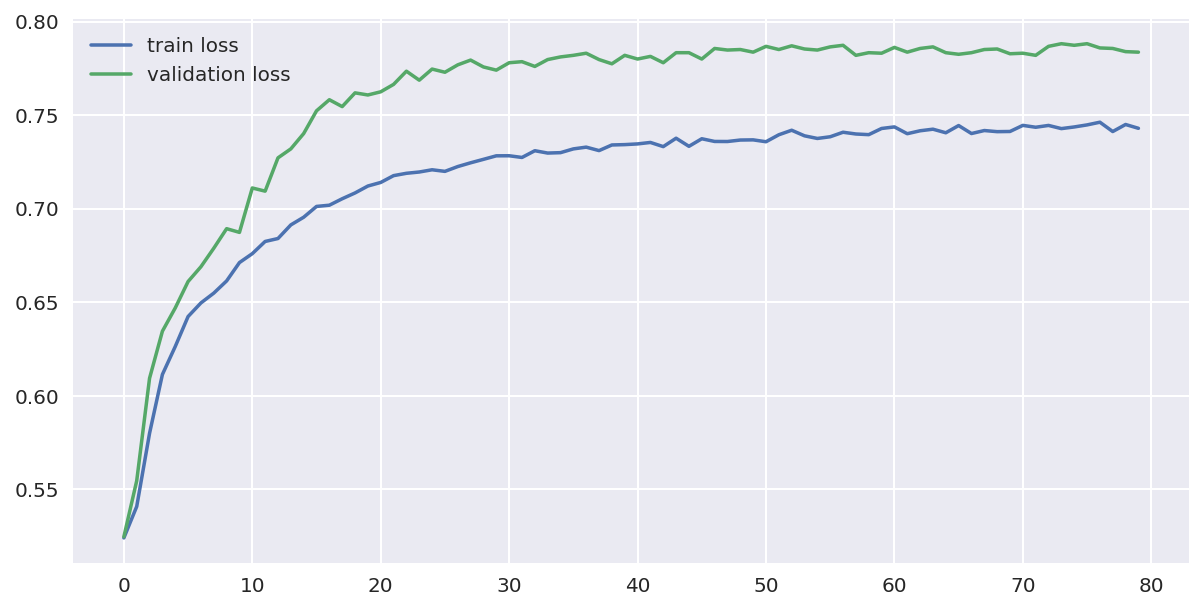

In [84]:
plot_losses(history.history['acc'], history.history['val_acc'], 1)

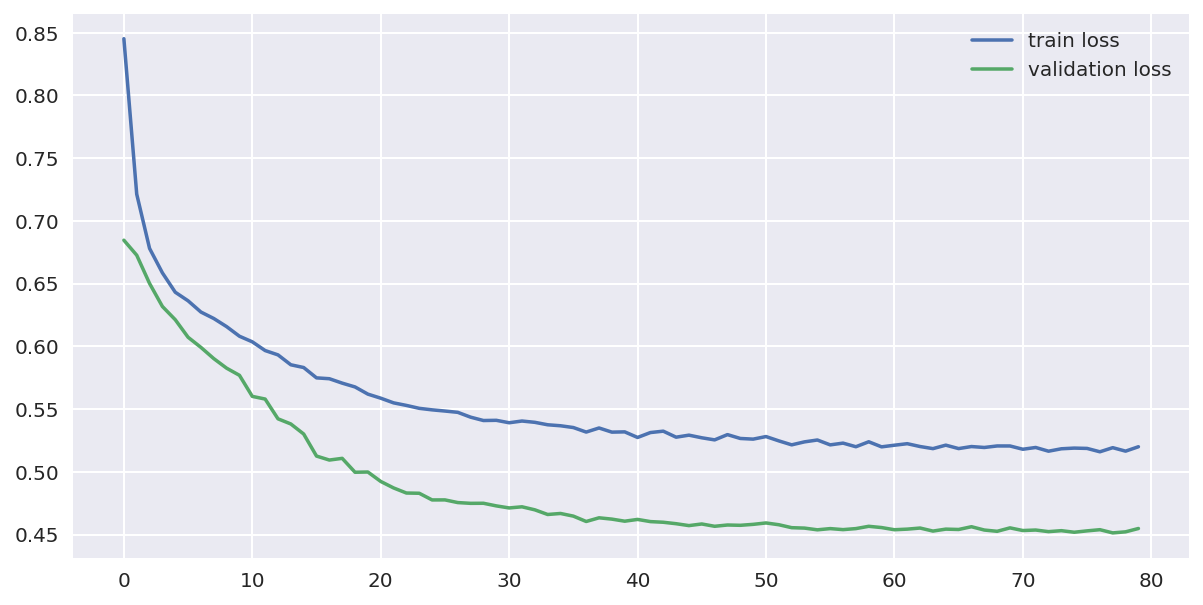

In [85]:
plot_losses(history.history['loss'], history.history['val_loss'], 1)

# LEF1

In [86]:
df_val, df_test, history = evaluate_fold(1)

Test fold: LEF1.csv
Train fold: CTNNB1.csv
Train fold: Jnk.csv
Train fold: Erk.csv
Train fold: IRF4.csv
Train fold: MYC.csv
Train fold: Ikk2.csv
Train on 31764 samples, validate on 3528 samples
Epoch 1/80
31488/31764 [============================>.] - ETA: 0s - loss: 0.8335 - acc: 0.5210
Epoch 00001: val_loss improved from inf to 0.68902, saving model to _data/model.best.hdf5
31764/31764 [==============================] - 5s 160us/step - loss: 0.8329 - acc: 0.5210 - val_loss: 0.6890 - val_acc: 0.5295
Epoch 2/80
31616/31764 [============================>.] - ETA: 0s - loss: 0.7175 - acc: 0.5435
Epoch 00002: val_loss improved from 0.68902 to 0.67260, saving model to _data/model.best.hdf5
31764/31764 [==============================] - 3s 80us/step - loss: 0.7171 - acc: 0.5439 - val_loss: 0.6726 - val_acc: 0.5581
Epoch 3/80
31360/31764 [============================>.] - ETA: 0s - loss: 0.6757 - acc: 0.5895
Epoch 00003: val_loss improved from 0.67260 to 0.63711, saving model to _data/model.

31616/31764 [============================>.] - ETA: 0s - loss: 0.5366 - acc: 0.7284
Epoch 00027: val_loss did not improve
31764/31764 [==============================] - 2s 74us/step - loss: 0.5367 - acc: 0.7286 - val_loss: 0.4808 - val_acc: 0.7636
Epoch 28/80
31488/31764 [============================>.] - ETA: 0s - loss: 0.5334 - acc: 0.7288
Epoch 00028: val_loss improved from 0.47786 to 0.47471, saving model to _data/model.best.hdf5
31764/31764 [==============================] - 2s 74us/step - loss: 0.5332 - acc: 0.7289 - val_loss: 0.4747 - val_acc: 0.7707
Epoch 29/80
31232/31764 [============================>.] - ETA: 0s - loss: 0.5301 - acc: 0.7312
Epoch 00029: val_loss did not improve
31764/31764 [==============================] - 2s 77us/step - loss: 0.5303 - acc: 0.7313 - val_loss: 0.4775 - val_acc: 0.7630
Epoch 30/80
31232/31764 [============================>.] - ETA: 0s - loss: 0.5311 - acc: 0.7332
Epoch 00030: val_loss did not improve
31764/31764 [=============================

Epoch 57/80
31488/31764 [============================>.] - ETA: 0s - loss: 0.5106 - acc: 0.7463
Epoch 00057: val_loss did not improve
31764/31764 [==============================] - 2s 65us/step - loss: 0.5110 - acc: 0.7461 - val_loss: 0.4708 - val_acc: 0.7701
Epoch 58/80
31232/31764 [============================>.] - ETA: 0s - loss: 0.5105 - acc: 0.7483
Epoch 00058: val_loss did not improve
31764/31764 [==============================] - 2s 73us/step - loss: 0.5107 - acc: 0.7480 - val_loss: 0.4695 - val_acc: 0.7747
Epoch 59/80
31360/31764 [============================>.] - ETA: 0s - loss: 0.5119 - acc: 0.7452
Epoch 00059: val_loss improved from 0.46699 to 0.46684, saving model to _data/model.best.hdf5
31764/31764 [==============================] - 2s 75us/step - loss: 0.5116 - acc: 0.7453 - val_loss: 0.4668 - val_acc: 0.7752
Epoch 60/80
31360/31764 [============================>.] - ETA: 0s - loss: 0.5123 - acc: 0.7445
Epoch 00060: val_loss did not improve
31764/31764 [=================

In [88]:
df_val

,Model,Fold,ROC-AUC,G-mean,F1-Score,TPR,TNR,Accuracy,Precision,Recall,Logloss,Description
0,CNN,LEF1.csv,0.858864,0.769344,0.80403,0.904762,0.654195,0.779478,0.723481,0.904762,0.464065,single-batch


In [89]:
df_test

,Model,Fold,ROC-AUC,G-mean,F1-Score,TPR,TNR,Accuracy,Precision,Recall,Logloss,Description
0,CNN,LEF1.csv,0.637195,0.589221,0.005383,0.651515,0.532883,0.533113,0.002703,0.651515,0.765345,single-batch


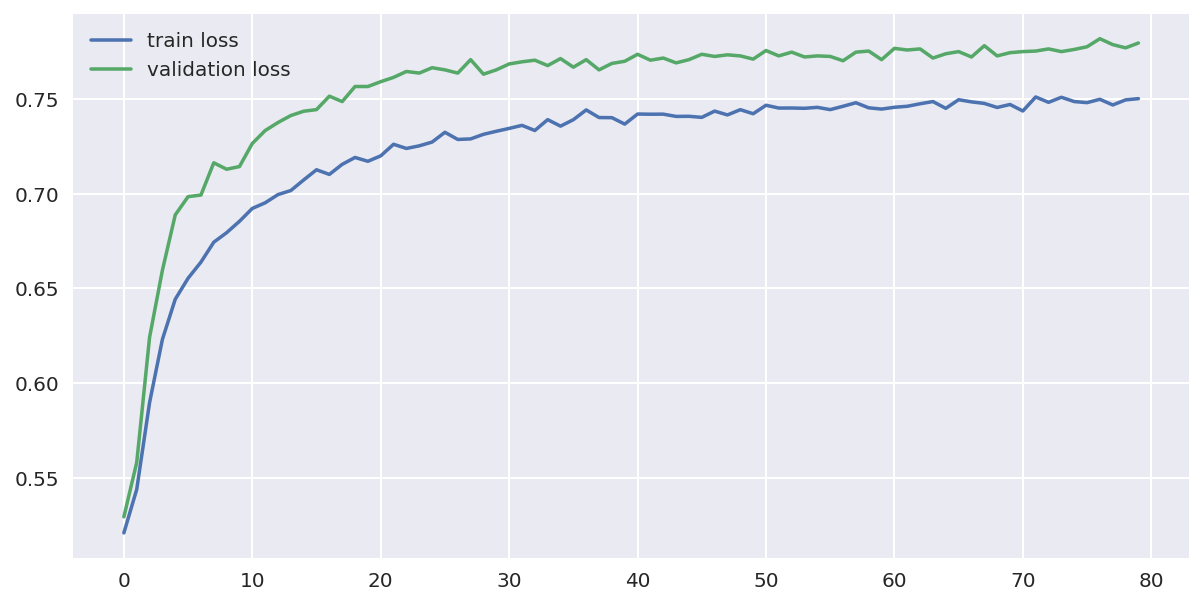

In [90]:
plot_losses(history.history['acc'], history.history['val_acc'], 1)

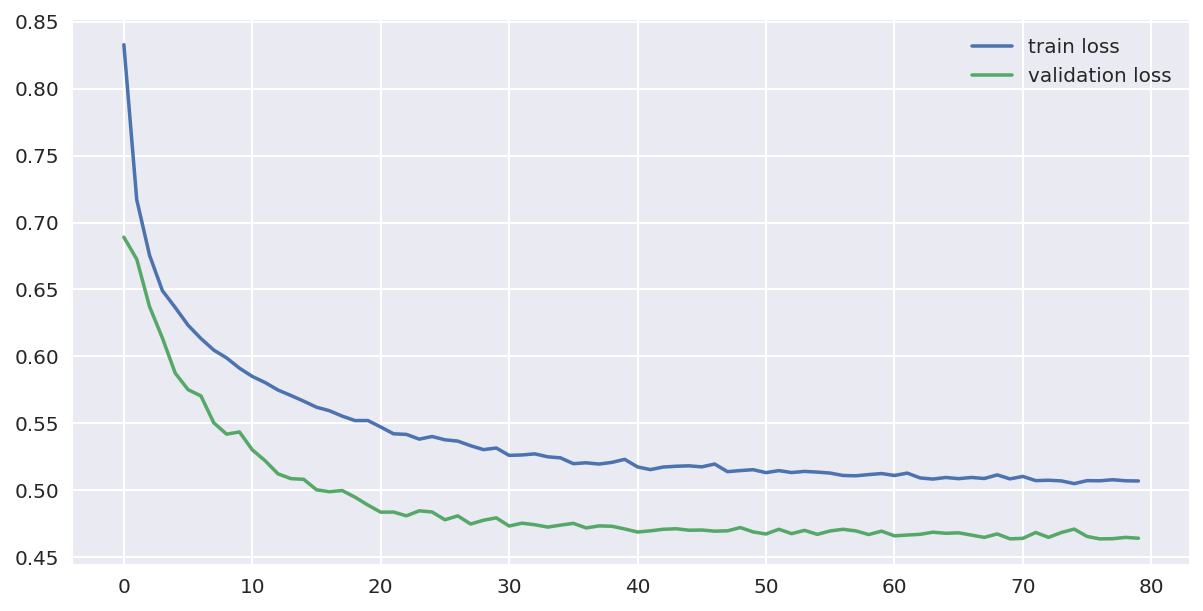

In [91]:
plot_losses(history.history['loss'], history.history['val_loss'], 1)

In [92]:
results_val = pd.concat((results_val, df_val))
results_test = pd.concat((results_test, df_test))
histories.append(history)

# Jnk

In [48]:
df_val, df_test, history = evaluate_fold(2)

Test fold: Jnk.csv
Train fold: CTNNB1.csv
Train fold: LEF1.csv
Train fold: Erk.csv
Train fold: IRF4.csv
Train fold: MYC.csv
Train fold: Ikk2.csv
Train on 19200 samples, validate on 2136 samples
Epoch 1/80
18816/19200 [============================>.] - ETA: 0s - loss: 0.9080 - acc: 0.5242
Epoch 00001: val_loss improved from inf to 0.68795, saving model to _data/model.best.hdf5
19200/19200 [==============================] - 3s 155us/step - loss: 0.9062 - acc: 0.5245 - val_loss: 0.6879 - val_acc: 0.5332
Epoch 2/80
18176/19200 [===========================>..] - ETA: 0s - loss: 0.7477 - acc: 0.5670
Epoch 00002: val_loss improved from 0.68795 to 0.66241, saving model to _data/model.best.hdf5
19200/19200 [==============================] - 1s 70us/step - loss: 0.7441 - acc: 0.5692 - val_loss: 0.6624 - val_acc: 0.5562
Epoch 3/80
18816/19200 [============================>.] - ETA: 0s - loss: 0.6768 - acc: 0.6099
Epoch 00003: val_loss improved from 0.66241 to 0.63630, saving model to _data/model.

Epoch 27/80
18816/19200 [============================>.] - ETA: 0s - loss: 0.4376 - acc: 0.8154
Epoch 00027: val_loss improved from 0.38932 to 0.38770, saving model to _data/model.best.hdf5
19200/19200 [==============================] - 2s 84us/step - loss: 0.4366 - acc: 0.8160 - val_loss: 0.3877 - val_acc: 0.8375
Epoch 28/80
18688/19200 [============================>.] - ETA: 0s - loss: 0.4344 - acc: 0.8180
Epoch 00028: val_loss improved from 0.38770 to 0.38681, saving model to _data/model.best.hdf5
19200/19200 [==============================] - 1s 73us/step - loss: 0.4349 - acc: 0.8180 - val_loss: 0.3868 - val_acc: 0.8399
Epoch 29/80
19072/19200 [============================>.] - ETA: 0s - loss: 0.4354 - acc: 0.8160
Epoch 00029: val_loss did not improve
19200/19200 [==============================] - 1s 78us/step - loss: 0.4360 - acc: 0.8157 - val_loss: 0.3881 - val_acc: 0.8366
Epoch 30/80
18944/19200 [============================>.] - ETA: 0s - loss: 0.4311 - acc: 0.8184
Epoch 00030:

Epoch 57/80
18688/19200 [============================>.] - ETA: 0s - loss: 0.4174 - acc: 0.8242
Epoch 00057: val_loss did not improve
19200/19200 [==============================] - 1s 75us/step - loss: 0.4161 - acc: 0.8246 - val_loss: 0.3842 - val_acc: 0.8394
Epoch 58/80
18560/19200 [============================>.] - ETA: 0s - loss: 0.4144 - acc: 0.8277
Epoch 00058: val_loss did not improve
19200/19200 [==============================] - 2s 80us/step - loss: 0.4159 - acc: 0.8269 - val_loss: 0.3862 - val_acc: 0.8371
Epoch 59/80
18688/19200 [============================>.] - ETA: 0s - loss: 0.4159 - acc: 0.8242
Epoch 00059: val_loss did not improve
19200/19200 [==============================] - 1s 70us/step - loss: 0.4162 - acc: 0.8241 - val_loss: 0.3860 - val_acc: 0.8375
Epoch 60/80
18560/19200 [============================>.] - ETA: 0s - loss: 0.4170 - acc: 0.8237
Epoch 00060: val_loss did not improve
19200/19200 [==============================] - 2s 80us/step - loss: 0.4160 - acc: 0.82

In [49]:
df_val

,Model,Fold,ROC-AUC,G-mean,F1-Score,TPR,TNR,Accuracy,Precision,Recall,Logloss,Description
0,CNN,Jnk.csv,0.90593,0.833363,0.854105,0.940075,0.738764,0.839419,0.782541,0.940075,0.383504,single-batch


In [50]:
df_test

,Model,Fold,ROC-AUC,G-mean,F1-Score,TPR,TNR,Accuracy,Precision,Recall,Logloss,Description
0,CNN,Jnk.csv,0.576109,0.283518,0.058105,0.085935,0.935386,0.907045,0.043891,0.085935,0.237471,single-batch


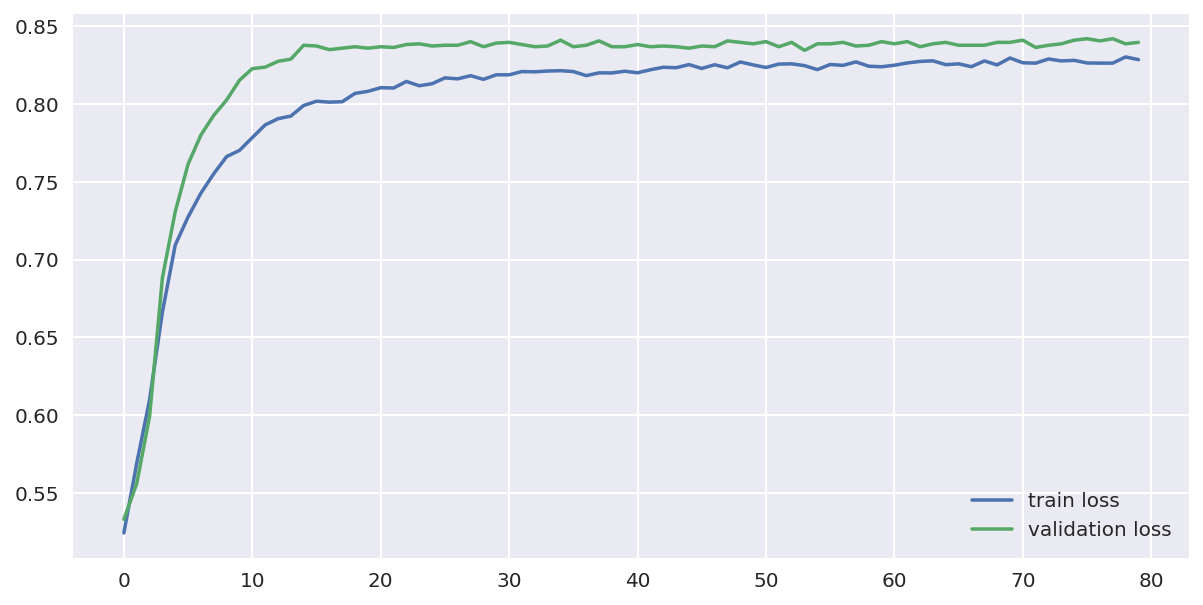

In [51]:
plot_losses(history.history['acc'], history.history['val_acc'], 1)

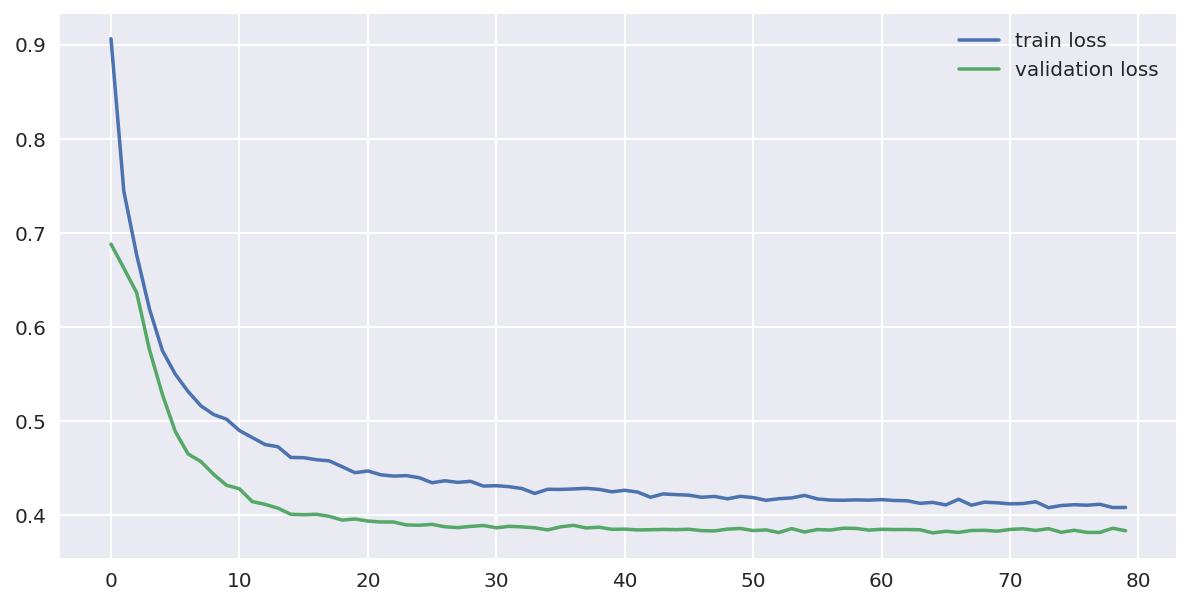

In [52]:
plot_losses(history.history['loss'], history.history['val_loss'], 1)

In [53]:
results_val = pd.concat((results_val, df_val))
results_test = pd.concat((results_test, df_test))
histories.append(history)

# Erk

In [54]:
df_val, df_test, history = evaluate_fold(3)

Test fold: Erk.csv
Train fold: CTNNB1.csv
Train fold: LEF1.csv
Train fold: Jnk.csv
Train fold: IRF4.csv
Train fold: MYC.csv
Train fold: Ikk2.csv
Train on 31524 samples, validate on 3504 samples
Epoch 1/80
31488/31524 [============================>.] - ETA: 0s - loss: 0.8191 - acc: 0.5171
Epoch 00001: val_loss improved from inf to 0.67596, saving model to _data/model.best.hdf5
31524/31524 [==============================] - 4s 119us/step - loss: 0.8190 - acc: 0.5172 - val_loss: 0.6760 - val_acc: 0.5542
Epoch 2/80
31360/31524 [============================>.] - ETA: 0s - loss: 0.7071 - acc: 0.5449
Epoch 00002: val_loss improved from 0.67596 to 0.66399, saving model to _data/model.best.hdf5
31524/31524 [==============================] - 3s 82us/step - loss: 0.7072 - acc: 0.5448 - val_loss: 0.6640 - val_acc: 0.5759
Epoch 3/80
31104/31524 [============================>.] - ETA: 0s - loss: 0.6750 - acc: 0.5872
Epoch 00003: val_loss improved from 0.66399 to 0.63692, saving model to _data/model.

31104/31524 [============================>.] - ETA: 0s - loss: 0.5305 - acc: 0.7307
Epoch 00027: val_loss did not improve
31524/31524 [==============================] - 2s 66us/step - loss: 0.5308 - acc: 0.7305 - val_loss: 0.5163 - val_acc: 0.7377
Epoch 28/80
30848/31524 [============================>.] - ETA: 0s - loss: 0.5302 - acc: 0.7308
Epoch 00028: val_loss improved from 0.51419 to 0.51108, saving model to _data/model.best.hdf5
31524/31524 [==============================] - 2s 74us/step - loss: 0.5304 - acc: 0.7307 - val_loss: 0.5111 - val_acc: 0.7469
Epoch 29/80
31104/31524 [============================>.] - ETA: 0s - loss: 0.5256 - acc: 0.7356
Epoch 00029: val_loss did not improve
31524/31524 [==============================] - 2s 76us/step - loss: 0.5252 - acc: 0.7361 - val_loss: 0.5133 - val_acc: 0.7400
Epoch 30/80
30976/31524 [============================>.] - ETA: 0s - loss: 0.5272 - acc: 0.7376
Epoch 00030: val_loss did not improve
31524/31524 [=============================

Epoch 58/80
30976/31524 [============================>.] - ETA: 0s - loss: 0.5128 - acc: 0.7454
Epoch 00058: val_loss did not improve
31524/31524 [==============================] - 2s 75us/step - loss: 0.5129 - acc: 0.7455 - val_loss: 0.5055 - val_acc: 0.7517
Epoch 59/80
30848/31524 [============================>.] - ETA: 0s - loss: 0.5114 - acc: 0.7441
Epoch 00059: val_loss did not improve
31524/31524 [==============================] - 2s 73us/step - loss: 0.5127 - acc: 0.7435 - val_loss: 0.5082 - val_acc: 0.7494
Epoch 60/80
31104/31524 [============================>.] - ETA: 0s - loss: 0.5124 - acc: 0.7439
Epoch 00060: val_loss did not improve
31524/31524 [==============================] - 2s 79us/step - loss: 0.5124 - acc: 0.7441 - val_loss: 0.5054 - val_acc: 0.7500
Epoch 61/80
31360/31524 [============================>.] - ETA: 0s - loss: 0.5107 - acc: 0.7454
Epoch 00061: val_loss did not improve
31524/31524 [==============================] - 2s 76us/step - loss: 0.5107 - acc: 0.74

In [55]:
df_val

,Model,Fold,ROC-AUC,G-mean,F1-Score,TPR,TNR,Accuracy,Precision,Recall,Logloss,Description
0,CNN,Erk.csv,0.830621,0.737609,0.783669,0.898402,0.605594,0.751998,0.694923,0.898402,0.506049,single-batch


In [56]:
df_test

,Model,Fold,ROC-AUC,G-mean,F1-Score,TPR,TNR,Accuracy,Precision,Recall,Logloss,Description
0,CNN,Erk.csv,0.625658,0.605846,0.005867,0.583333,0.629227,0.629141,0.002948,0.583333,0.602626,single-batch


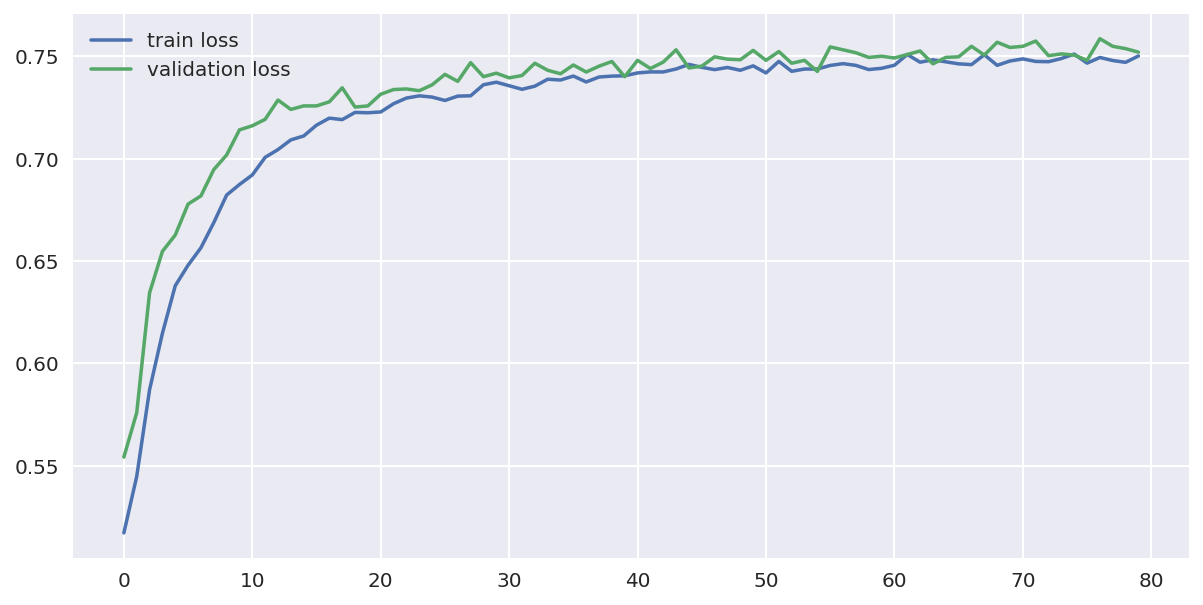

In [57]:
plot_losses(history.history['acc'], history.history['val_acc'], 1)

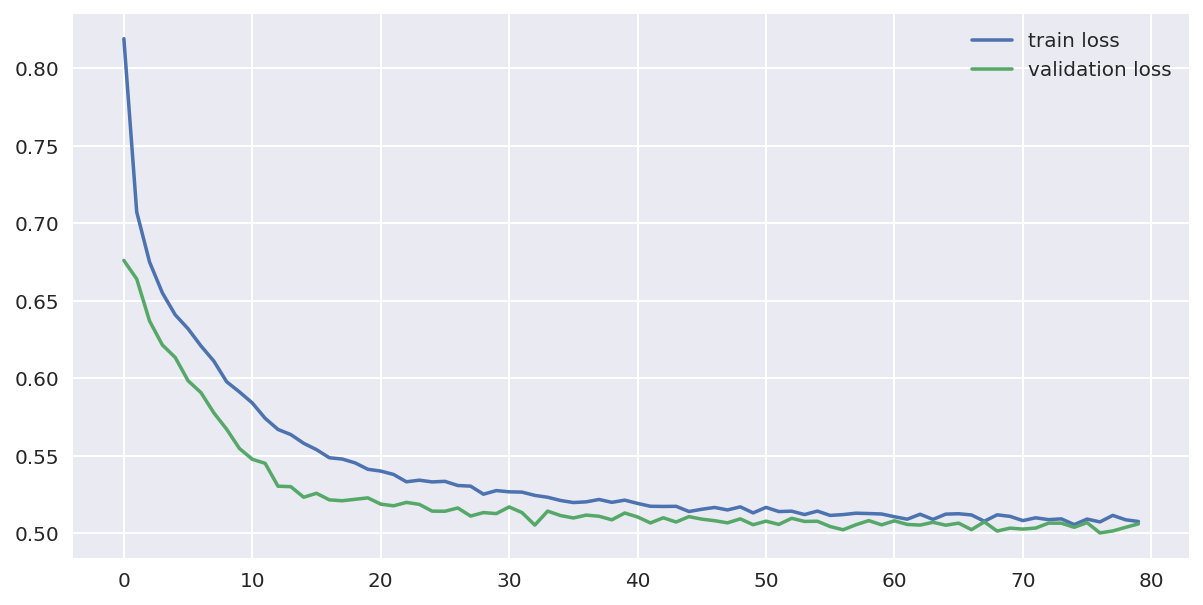

In [58]:
plot_losses(history.history['loss'], history.history['val_loss'], 1)

In [59]:
results_val = pd.concat((results_val, df_val))
results_test = pd.concat((results_test, df_test))
histories.append(history)

# IRF4

In [60]:
df_val, df_test, history = evaluate_fold(4)

Test fold: IRF4.csv
Train fold: CTNNB1.csv
Train fold: LEF1.csv
Train fold: Jnk.csv
Train fold: Erk.csv
Train fold: MYC.csv
Train fold: Ikk2.csv
Train on 31884 samples, validate on 3540 samples
Epoch 1/80
31744/31884 [============================>.] - ETA: 0s - loss: 0.8895 - acc: 0.5165
Epoch 00001: val_loss improved from inf to 0.67359, saving model to _data/model.best.hdf5
31884/31884 [==============================] - 5s 144us/step - loss: 0.8890 - acc: 0.5166 - val_loss: 0.6736 - val_acc: 0.6003
Epoch 2/80
31744/31884 [============================>.] - ETA: 0s - loss: 0.7284 - acc: 0.5381
Epoch 00002: val_loss improved from 0.67359 to 0.66739, saving model to _data/model.best.hdf5
31884/31884 [==============================] - 3s 92us/step - loss: 0.7284 - acc: 0.5380 - val_loss: 0.6674 - val_acc: 0.5638
Epoch 3/80
31872/31884 [============================>.] - ETA: 0s - loss: 0.6854 - acc: 0.5687
Epoch 00003: val_loss improved from 0.66739 to 0.64053, saving model to _data/model.

Epoch 27/80
31360/31884 [============================>.] - ETA: 0s - loss: 0.5400 - acc: 0.7260
Epoch 00027: val_loss improved from 0.48997 to 0.48831, saving model to _data/model.best.hdf5
31884/31884 [==============================] - 3s 81us/step - loss: 0.5396 - acc: 0.7262 - val_loss: 0.4883 - val_acc: 0.7568
Epoch 28/80
31360/31884 [============================>.] - ETA: 0s - loss: 0.5381 - acc: 0.7268
Epoch 00028: val_loss improved from 0.48831 to 0.48765, saving model to _data/model.best.hdf5
31884/31884 [==============================] - 2s 75us/step - loss: 0.5371 - acc: 0.7274 - val_loss: 0.4877 - val_acc: 0.7588
Epoch 29/80
31872/31884 [============================>.] - ETA: 0s - loss: 0.5401 - acc: 0.7241
Epoch 00029: val_loss did not improve
31884/31884 [==============================] - 2s 73us/step - loss: 0.5400 - acc: 0.7242 - val_loss: 0.4882 - val_acc: 0.7596
Epoch 30/80
31872/31884 [============================>.] - ETA: 0s - loss: 0.5406 - acc: 0.7246
Epoch 00030:

31488/31884 [============================>.] - ETA: 0s - loss: 0.5258 - acc: 0.7333
Epoch 00056: val_loss did not improve
31884/31884 [==============================] - 3s 80us/step - loss: 0.5262 - acc: 0.7331 - val_loss: 0.4813 - val_acc: 0.7678
Epoch 57/80
31232/31884 [============================>.] - ETA: 0s - loss: 0.5262 - acc: 0.7349
Epoch 00057: val_loss improved from 0.48092 to 0.48035, saving model to _data/model.best.hdf5
31884/31884 [==============================] - 2s 77us/step - loss: 0.5257 - acc: 0.7354 - val_loss: 0.4803 - val_acc: 0.7669
Epoch 58/80
31360/31884 [============================>.] - ETA: 0s - loss: 0.5301 - acc: 0.7283
Epoch 00058: val_loss did not improve
31884/31884 [==============================] - 2s 77us/step - loss: 0.5303 - acc: 0.7283 - val_loss: 0.4818 - val_acc: 0.7636
Epoch 59/80
31872/31884 [============================>.] - ETA: 0s - loss: 0.5288 - acc: 0.7337
Epoch 00059: val_loss did not improve
31884/31884 [=============================

In [61]:
df_val

,Model,Fold,ROC-AUC,G-mean,F1-Score,TPR,TNR,Accuracy,Precision,Recall,Logloss,Description
0,CNN,IRF4.csv,0.846256,0.761829,0.795661,0.89096,0.651412,0.771186,0.718778,0.89096,0.478951,single-batch


In [62]:
df_test

,Model,Fold,ROC-AUC,G-mean,F1-Score,TPR,TNR,Accuracy,Precision,Recall,Logloss,Description
0,CNN,IRF4.csv,0.55751,0.503196,0.001442,0.636364,0.397896,0.398059,0.000722,0.636364,0.816866,single-batch


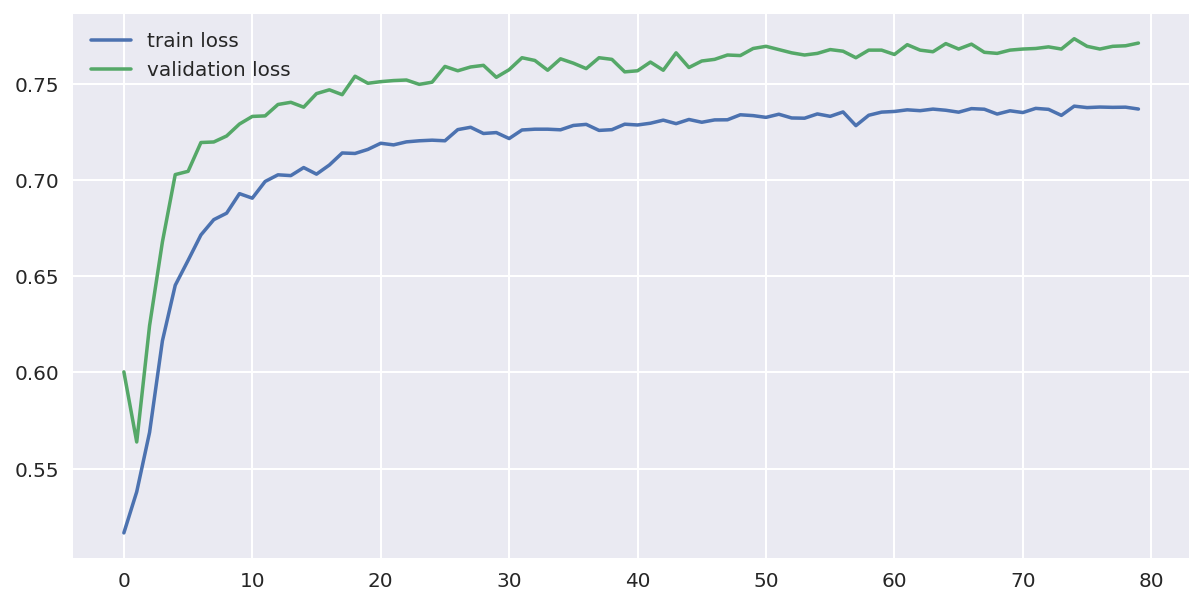

In [63]:
plot_losses(history.history['acc'], history.history['val_acc'], 1)

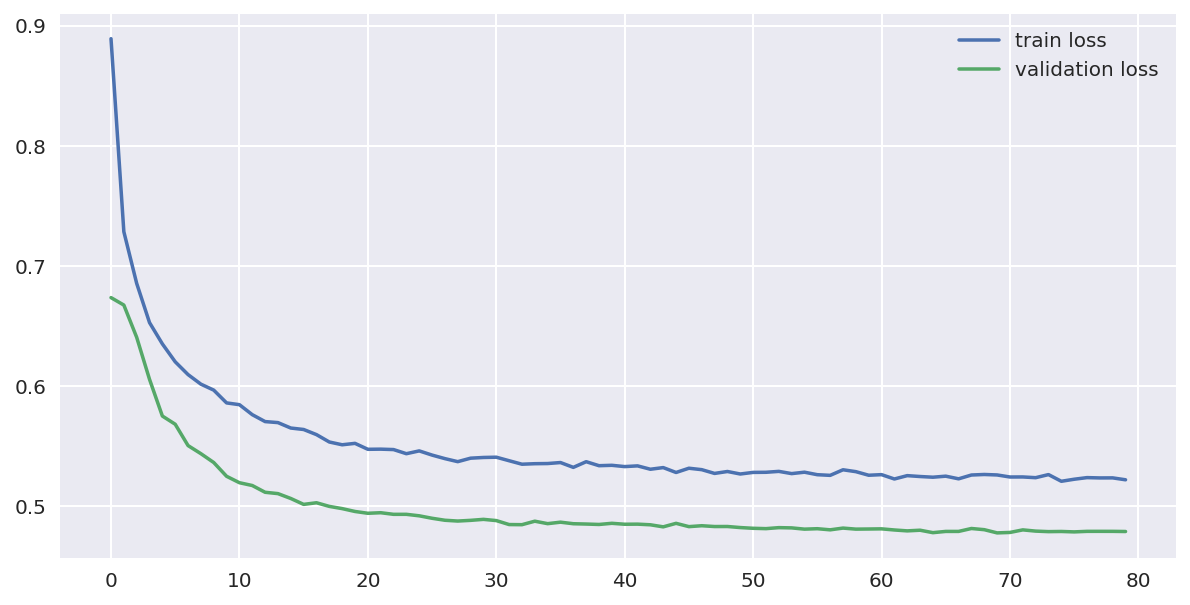

In [64]:
plot_losses(history.history['loss'], history.history['val_loss'], 1)

In [65]:
results_val = pd.concat((results_val, df_val))
results_test = pd.concat((results_test, df_test))
histories.append(history)

# MYC

In [95]:
df_val, df_test, history = evaluate_fold(5)

Test fold: MYC.csv
Train fold: CTNNB1.csv
Train fold: LEF1.csv
Train fold: Jnk.csv
Train fold: Erk.csv
Train fold: IRF4.csv
Train fold: Ikk2.csv
Train on 21924 samples, validate on 2436 samples
Epoch 1/80
21760/21924 [============================>.] - ETA: 0s - loss: 0.8498 - acc: 0.5242
Epoch 00001: val_loss improved from inf to 0.68497, saving model to _data/model.best.hdf5
21924/21924 [==============================] - 5s 225us/step - loss: 0.8496 - acc: 0.5242 - val_loss: 0.6850 - val_acc: 0.5411
Epoch 2/80
21376/21924 [============================>.] - ETA: 0s - loss: 0.7354 - acc: 0.5369
Epoch 00002: val_loss improved from 0.68497 to 0.68293, saving model to _data/model.best.hdf5
21924/21924 [==============================] - 2s 81us/step - loss: 0.7348 - acc: 0.5374 - val_loss: 0.6829 - val_acc: 0.5394
Epoch 3/80
21376/21924 [============================>.] - ETA: 0s - loss: 0.6937 - acc: 0.5622
Epoch 00003: val_loss improved from 0.68293 to 0.68013, saving model to _data/model.

Epoch 28/80
21120/21924 [===========================>..] - ETA: 0s - loss: 0.5461 - acc: 0.7296
Epoch 00028: val_loss improved from 0.53581 to 0.52871, saving model to _data/model.best.hdf5
21924/21924 [==============================] - 2s 75us/step - loss: 0.5467 - acc: 0.7295 - val_loss: 0.5287 - val_acc: 0.7406
Epoch 29/80
21632/21924 [============================>.] - ETA: 0s - loss: 0.5468 - acc: 0.7305
Epoch 00029: val_loss did not improve
21924/21924 [==============================] - 2s 68us/step - loss: 0.5471 - acc: 0.7303 - val_loss: 0.5369 - val_acc: 0.7336
Epoch 30/80
21888/21924 [============================>.] - ETA: 0s - loss: 0.5398 - acc: 0.7330
Epoch 00030: val_loss did not improve
21924/21924 [==============================] - 2s 75us/step - loss: 0.5397 - acc: 0.7332 - val_loss: 0.5295 - val_acc: 0.7426
Epoch 31/80
21376/21924 [============================>.] - ETA: 0s - loss: 0.5366 - acc: 0.7351
Epoch 00031: val_loss improved from 0.52871 to 0.52698, saving model

21760/21924 [============================>.] - ETA: 0s - loss: 0.5144 - acc: 0.7538
Epoch 00056: val_loss did not improve
21924/21924 [==============================] - 2s 72us/step - loss: 0.5144 - acc: 0.7538 - val_loss: 0.5015 - val_acc: 0.7529
Epoch 57/80
21760/21924 [============================>.] - ETA: 0s - loss: 0.5140 - acc: 0.7561
Epoch 00057: val_loss did not improve
21924/21924 [==============================] - 2s 76us/step - loss: 0.5143 - acc: 0.7562 - val_loss: 0.4988 - val_acc: 0.7525
Epoch 58/80
21504/21924 [============================>.] - ETA: 0s - loss: 0.5142 - acc: 0.7567
Epoch 00058: val_loss did not improve
21924/21924 [==============================] - 2s 76us/step - loss: 0.5138 - acc: 0.7569 - val_loss: 0.5041 - val_acc: 0.7479
Epoch 59/80
21632/21924 [============================>.] - ETA: 0s - loss: 0.5111 - acc: 0.7570
Epoch 00059: val_loss did not improve
21924/21924 [==============================] - 2s 69us/step - loss: 0.5118 - acc: 0.7565 - val_los

In [96]:
df_val

,Model,Fold,ROC-AUC,G-mean,F1-Score,TPR,TNR,Accuracy,Precision,Recall,Logloss,Description
0,CNN,MYC.csv,0.836153,0.737843,0.792135,0.926108,0.587849,0.756979,0.692025,0.926108,0.491091,single-batch


In [97]:
df_test

,Model,Fold,ROC-AUC,G-mean,F1-Score,TPR,TNR,Accuracy,Precision,Recall,Logloss,Description
0,CNN,MYC.csv,0.651564,0.513645,0.186159,0.83512,0.31592,0.361332,0.104755,0.83512,0.892601,single-batch


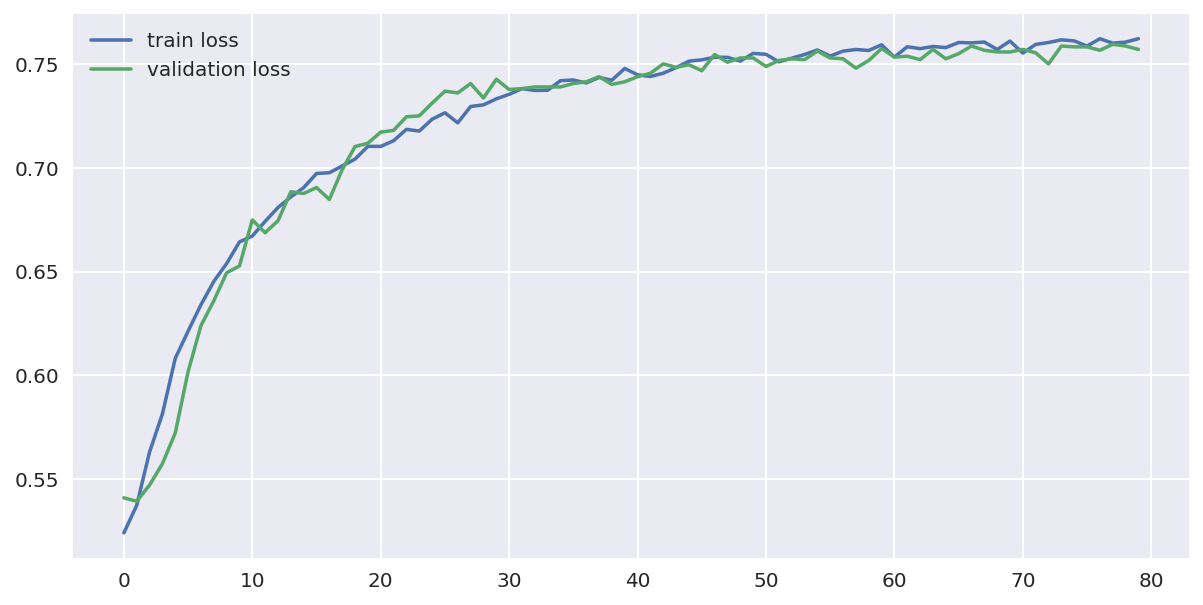

In [98]:
plot_losses(history.history['acc'], history.history['val_acc'], 1)

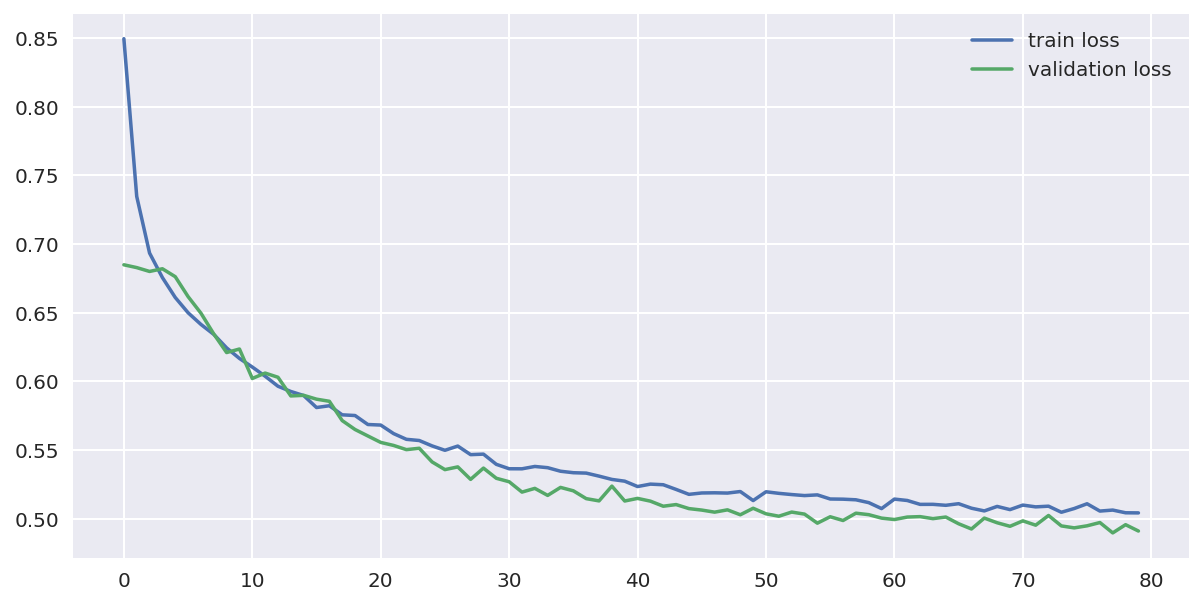

In [99]:
plot_losses(history.history['loss'], history.history['val_loss'], 1)

In [100]:
results_val = pd.concat((results_val, df_val))
results_test = pd.concat((results_test, df_test))
histories.append(history)

# Ikk2

In [71]:
df_val, df_test, history = evaluate_fold(6)

Test fold: Ikk2.csv
Train fold: CTNNB1.csv
Train fold: LEF1.csv
Train fold: Jnk.csv
Train fold: Erk.csv
Train fold: IRF4.csv
Train fold: MYC.csv
Train on 23808 samples, validate on 2652 samples
Epoch 1/80
23424/23808 [============================>.] - ETA: 0s - loss: 0.8439 - acc: 0.5127
Epoch 00001: val_loss improved from inf to 0.68675, saving model to _data/model.best.hdf5
23808/23808 [==============================] - 4s 171us/step - loss: 0.8428 - acc: 0.5123 - val_loss: 0.6867 - val_acc: 0.5215
Epoch 2/80
23680/23808 [============================>.] - ETA: 0s - loss: 0.7289 - acc: 0.5326
Epoch 00002: val_loss improved from 0.68675 to 0.68342, saving model to _data/model.best.hdf5
23808/23808 [==============================] - 2s 83us/step - loss: 0.7289 - acc: 0.5326 - val_loss: 0.6834 - val_acc: 0.5279
Epoch 3/80
23680/23808 [============================>.] - ETA: 0s - loss: 0.6911 - acc: 0.5579
Epoch 00003: val_loss improved from 0.68342 to 0.66877, saving model to _data/model.

Epoch 27/80
23296/23808 [============================>.] - ETA: 0s - loss: 0.4998 - acc: 0.7646
Epoch 00027: val_loss did not improve
23808/23808 [==============================] - 2s 74us/step - loss: 0.4993 - acc: 0.7650 - val_loss: 0.3980 - val_acc: 0.8232
Epoch 28/80
23040/23808 [============================>.] - ETA: 0s - loss: 0.4984 - acc: 0.7661
Epoch 00028: val_loss did not improve
23808/23808 [==============================] - 2s 82us/step - loss: 0.4984 - acc: 0.7660 - val_loss: 0.3972 - val_acc: 0.8235
Epoch 29/80
23168/23808 [============================>.] - ETA: 0s - loss: 0.4973 - acc: 0.7670
Epoch 00029: val_loss did not improve
23808/23808 [==============================] - 2s 76us/step - loss: 0.4971 - acc: 0.7671 - val_loss: 0.3966 - val_acc: 0.8232
Epoch 30/80
23168/23808 [============================>.] - ETA: 0s - loss: 0.4944 - acc: 0.7686
Epoch 00030: val_loss improved from 0.39587 to 0.39052, saving model to _data/model.best.hdf5
23808/23808 [=================

23424/23808 [============================>.] - ETA: 0s - loss: 0.4739 - acc: 0.7826
Epoch 00056: val_loss did not improve
23808/23808 [==============================] - 2s 80us/step - loss: 0.4738 - acc: 0.7827 - val_loss: 0.3804 - val_acc: 0.8311
Epoch 57/80
23680/23808 [============================>.] - ETA: 0s - loss: 0.4716 - acc: 0.7851
Epoch 00057: val_loss did not improve
23808/23808 [==============================] - 2s 66us/step - loss: 0.4718 - acc: 0.7850 - val_loss: 0.3801 - val_acc: 0.8318
Epoch 58/80
23680/23808 [============================>.] - ETA: 0s - loss: 0.4684 - acc: 0.7850
Epoch 00058: val_loss improved from 0.37925 to 0.37740, saving model to _data/model.best.hdf5
23808/23808 [==============================] - 2s 74us/step - loss: 0.4686 - acc: 0.7847 - val_loss: 0.3774 - val_acc: 0.8352
Epoch 59/80
23168/23808 [============================>.] - ETA: 0s - loss: 0.4708 - acc: 0.7864
Epoch 00059: val_loss did not improve
23808/23808 [=============================

In [72]:
df_val

,Model,Fold,ROC-AUC,G-mean,F1-Score,TPR,TNR,Accuracy,Precision,Recall,Logloss,Description
0,CNN,Ikk2.csv,0.904043,0.829065,0.849588,0.932881,0.736802,0.834842,0.77995,0.932881,0.374259,single-batch


In [73]:
df_test

,Model,Fold,ROC-AUC,G-mean,F1-Score,TPR,TNR,Accuracy,Precision,Recall,Logloss,Description
0,CNN,Ikk2.csv,0.548353,0.527993,0.085519,0.512973,0.543452,0.542181,0.046648,0.512973,0.713152,single-batch


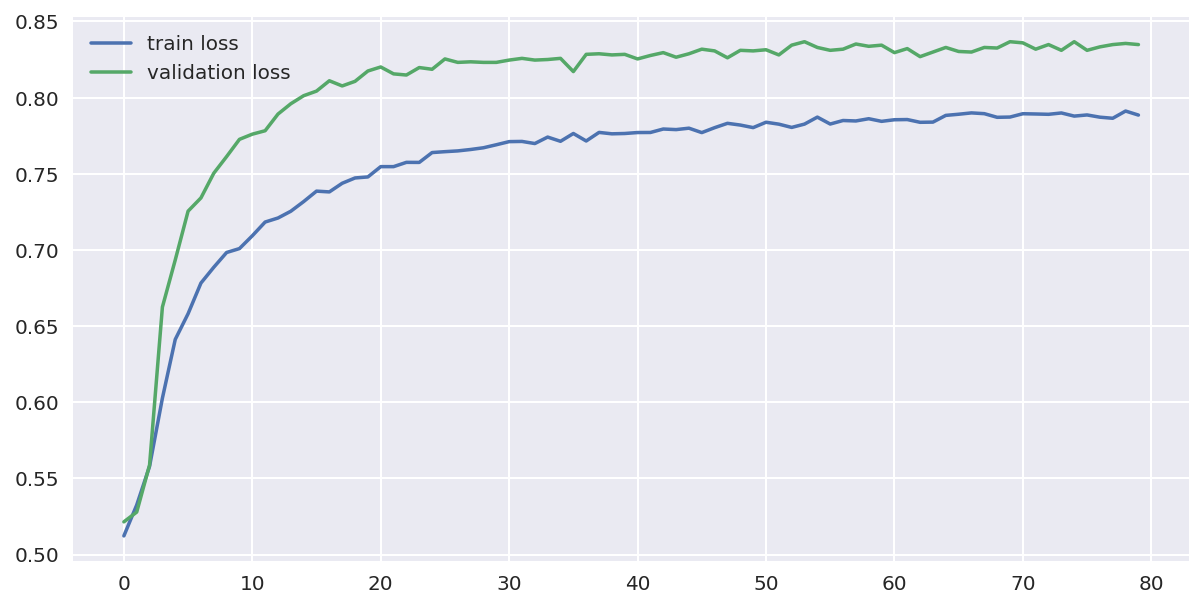

In [74]:
plot_losses(history.history['acc'], history.history['val_acc'], 1)

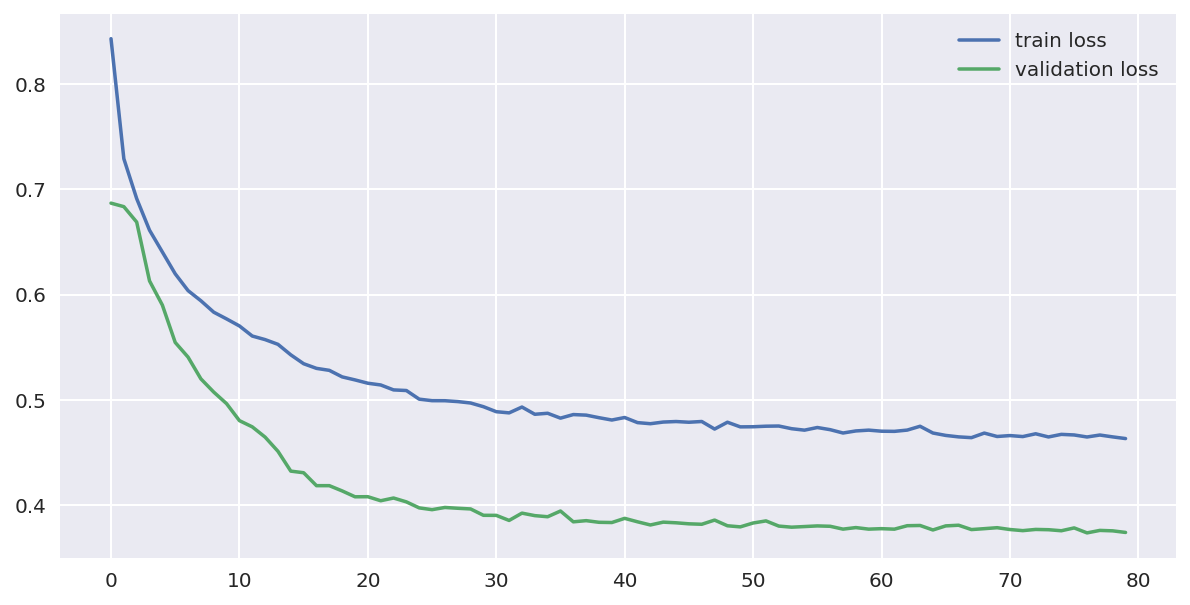

In [75]:
plot_losses(history.history['loss'], history.history['val_loss'], 1)

In [76]:
results_val = pd.concat((results_val, df_val))
results_test = pd.concat((results_test, df_test))
histories.append(history)

In [101]:
results_val

,Model,Fold,ROC-AUC,G-mean,F1-Score,TPR,TNR,Accuracy,Precision,Recall,Logloss,Description
0,CNN,CTNNB1.csv,0.853095,0.772507,0.810341,0.920904,0.648023,0.784463,0.723480,0.920904,0.460662,single-batch
0,CNN,LEF1.csv,0.852803,0.753411,0.797828,0.916100,0.619615,0.767857,0.706603,0.916100,0.472092,single-batch
0,CNN,Jnk.csv,0.905930,0.833363,0.854105,0.940075,0.738764,0.839419,0.782541,0.940075,0.383504,single-batch
0,CNN,Erk.csv,0.830621,0.737609,0.783669,0.898402,0.605594,0.751998,0.694923,0.898402,0.506049,single-batch
0,CNN,IRF4.csv,0.846256,0.761829,0.795661,0.890960,0.651412,0.771186,0.718778,0.890960,0.478951,single-batch
0,CNN,Ikk2.csv,0.904043,0.829065,0.849588,0.932881,0.736802,0.834842,0.779950,0.932881,0.374259,single-batch
0,CNN,CTNNB1.csv,0.857352,0.769399,0.811608,0.932203,0.635028,0.783616,0.718641,0.932203,0.454834,single-batch
0,CNN,LEF1.csv,0.858864,0.769344,0.804030,0.904762,0.654195,0.779478,0.723481,0.904762,0.464065,single-batch
0,CNN,MYC.csv,0.836153,0.737843,0.792135,0.926108,0.587849,0.756979,0.692025,0.926108,0.491091,single-batch


In [102]:
results_test

,Model,Fold,ROC-AUC,G-mean,F1-Score,TPR,TNR,Accuracy,Precision,Recall,Logloss,Description
0,CNN,CTNNB1.csv,0.612484,0.526721,0.002024,0.383333,0.723743,0.723494,0.001015,0.383333,0.459863,single-batch
0,CNN,LEF1.csv,0.686774,0.628683,0.006173,0.712121,0.555021,0.555325,0.003100,0.712121,0.712901,single-batch
0,CNN,Jnk.csv,0.576109,0.283518,0.058105,0.085935,0.935386,0.907045,0.043891,0.085935,0.237471,single-batch
0,CNN,Erk.csv,0.625658,0.605846,0.005867,0.583333,0.629227,0.629141,0.002948,0.583333,0.602626,single-batch
0,CNN,IRF4.csv,0.557510,0.503196,0.001442,0.636364,0.397896,0.398059,0.000722,0.636364,0.816866,single-batch
0,CNN,Ikk2.csv,0.548353,0.527993,0.085519,0.512973,0.543452,0.542181,0.046648,0.512973,0.713152,single-batch
0,CNN,CTNNB1.csv,0.597846,0.547898,0.002337,0.400000,0.750482,0.750226,0.001172,0.400000,0.419736,single-batch
0,CNN,LEF1.csv,0.637195,0.589221,0.005383,0.651515,0.532883,0.533113,0.002703,0.651515,0.765345,single-batch
0,CNN,MYC.csv,0.651564,0.513645,0.186159,0.835120,0.315920,0.361332,0.104755,0.835120,0.892601,single-batch


In [103]:
results_val.to_csv('_data/results_val.csv', index=False)
results_test.to_csv('_data/results_test.csv', index=False)